## Python statistics essential training - 03_03_histograms

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [8]:
china1965 = pd.read_csv('income-1965-china.csv')
china2015 = pd.read_csv('income-2015-china.csv')
usa1965 = pd.read_csv('income-1965-usa.csv')
usa2015 = pd.read_csv('income-2015-usa.csv')

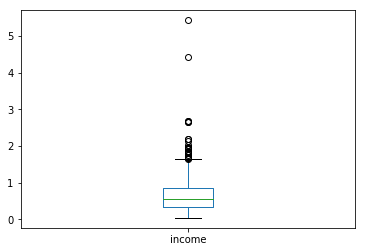

In [5]:
china1965.income.plot(kind='box')

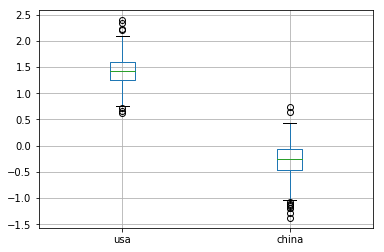

In [7]:
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

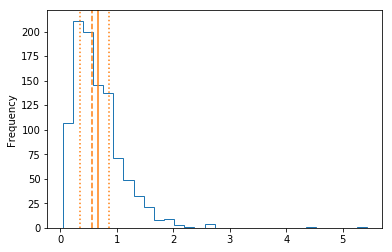

In [11]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

# plot the descriptive statistics as vertical line markers
plt.axvline(china1965.income.mean(),c='C1')
plt.axvline(china1965.income.median(),c='C1',linestyle='--')
plt.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
plt.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')


(0, 3, 0.0, 1.308676977766925)

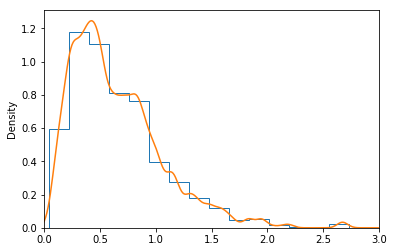

In [13]:
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density(bw_method=0.1) # the model is an approximation by whcih the scale of smoothing is
                                            # set by the bw_methodb

plt.axis(xmin=0,xmax=3)

([<matplotlib.axis.XTick at 0x1a2010cb70>,
 <a list of 9 Text xticklabel objects>)

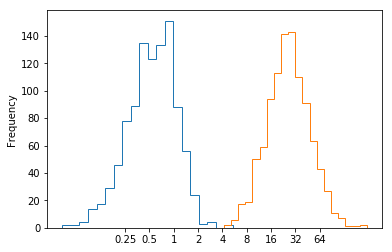

In [11]:
#how do the incomes compare btwn the USA and China in 1965

china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

#de-log the levels and attach them in place of the 10logged values for income.
levels = [.25,.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels),levels)

In [ ]:
# The richest in china are still have less capital than the americans with the least capital...

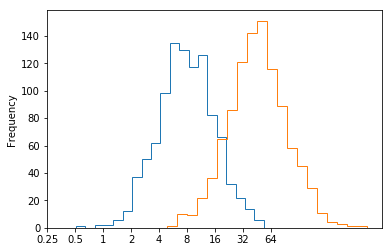

In [17]:
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels),levels);

# here we can see that america and china re both richer with significantly more overlap between them.
# lets rescale according to the relative population sizes.

In [15]:
#load in world population data
gapminder = pd.read_csv('gapminder.csv')

In [16]:
# access the china 2015 population datum and cast it as a float since it is a pd.series object
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)

In [17]:
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [18]:
# inspect the numbers
china_pop2015, usa_pop2015

# we can see the china and usa pops in 2015 are 1.4bn and 321mn respectively.

(1376048943.0, 321773631.0)

In [20]:
# Create weights in order to produce the weighted histograms
# the weights are the population dvided by the bumber of records

china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

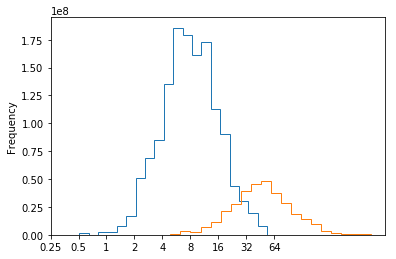

In [22]:
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels),levels);

In [ ]:
# it can be seen that America is richer, however there is a lot of purchasing power at the richer end of the chinese
# population where it overlaps with the US so corporations would do well to tap that market...

